# **Implementación del Algoritmo CYK y Análisis de su Complejidad**

César Camilo Martinez Andrade

Mateo Pissarello Londoño

David Ricardo Jimenez Nuñez


## 1. ¿Qué es el algoritmo CYK?

El Algoritmo de ocke-Younger-Kasami (CYK) determina si una cadena puede ser generada o no por una gramática libre de contexto y, si es posible, cómo puede llegar a ser generada. Este resulta ser el análisis sintáctico de la cadena.

CYK reconoce lenguajes definidos por una gramática libre de contexto escrita en la forma normal de Chomsky (CNF). Ejemplo:

$${\displaystyle A}
{\displaystyle \rightarrow \,}
E
S
$$

$${\displaystyle E}
{\displaystyle \rightarrow \,}
α $$

$${\displaystyle S}
{\displaystyle \rightarrow \,}
ϵ $$

Nótese que cualquier gramática libre de contexto puede ser convertida a CNF. También es importante saber que  se puede ajustar el algoritmo CYK para que trabaje sobre algunas gramáticas no escritas como CNF. Esto puede hacerse para mejorar la ejecución, aunque el algoritmo pasa a ser más difícil de comprender.

En el peor caso la complejidad temporal de CYK es de Θ(n3), donde n es la longitud de la cadena analizada. Esto convierte al CYK como uno de los algoritmos más eficientes en el reconocimiento de los lenguajes libres de contexto.

# 2. Implementación

El input del algoritmo está formado por una gramática libre de
contexto.

$$G = (V, Σ, q0, P)$$

y por una forma terminal, es decir,

$$ω := a_1a_2 · · · a_n−1a_n ∈ Σ*$$

Siendo *ω* una cadena con *n* carácteres pertenecientes al vocabulario *Σ*

El output del algoritmo es una tabla triangular. Para
interpretarlo, podemos entender la tabla de output como:

$$t :  [(i, j) : 1 ≤ i ≤ n, 1 ≤ j ≤ n − i + 1 ] → P(V)$$

Donde *V* son los símbolos no terminales de la gramática y
*P(V)* son los subconjuntos de V. A la imagen *t(i, j) ∈ P(V)* la
denotaremos con sub-índices. Es decir, escribiremos
ti,j ∈ P(V).

El algoritmo considera todas las subcadenas de ω que pueden ser generadas por la gramática, primero las de longitud 1, continua con las de longitud 2 y así sucesivamente, en caso de que la longitud de ω se considera cada partición posible de 2 partes. Una vez esto se complete la cadena es reconocida por la gramática.

Ejemplo:

\begin{align}
S &\rightarrow \text{NP} \ \text{VP} \\
VP &\rightarrow \text{VP} \ \text{PP} \\
VP &\rightarrow \text{V} \ \text{NP} \\
VP &\rightarrow \text{come} \\
PP &\rightarrow \text{P} \ \text{NP} \\
NP &\rightarrow \text{Det} \ \text{N} \\
NP &\rightarrow \text{ella} \\
V &\rightarrow \text{come} \\
P &\rightarrow \text{con} \\
N &\rightarrow \text{pez} \\
N &\rightarrow \text{tenedor} \\
Det &\rightarrow \text{a}
\end{align}



In [89]:
import time

def cyk(String, Computed={}, Grammar=[]):
    if String in Computed:
        return Computed
    else:
        if len(String) == 1:
            Computed[String] = ""
            for Notation in Grammar:
                if Notation[1] == String:
                    Computed[String] += (Notation[0])
            Computed[String] = str(sorted(Computed[String])).replace("'", "").replace(" ", "")
            return Computed
        else:
            Computed[String] = ""
            for i in range(1, len(String)):
                Splitted1 = String[:i]
                Splitted2 = String[i:]
                Computed1 = cyk(Splitted1, Computed, Grammar)[Splitted1]
                Computed2 = cyk(Splitted2, Computed, Grammar)[Splitted2]
                if Computed1 != "" and Computed2 != "":
                    for Var1 in Computed1:
                        for Var2 in Computed2:
                            for Notation in Grammar:
                                if Var1 + Var2 in Notation[1] and Notation[0] not in Computed[String]:
                                    Computed[String] += (Notation[0])
            Computed[String] = str(sorted(Computed[String])).replace("'", "").replace(" ", "")
            return Computed


def print_cyk(String, Grammar):
    result = cyk(String, {}, Grammar)
    if result[String] != "[]" and "S" in result[String]:
        print("PERTENECE")
        for i in range(1, len(String) + 1):
            for j in range(len(String) - i):
                if String[j:j + i] in result:
                    print(String[j:j + i] + " : " + result[String[j:j + i]] + " , ", end="")
                else:
                    print(String[j:j + i] + " : " + "[]" + " , ", end="")
            print(String[-i:], " : " + result[String[-i:]])
    else:
        print("NO PERTENECE")


def cykcomplete(file_path):
    # Medición de tiempo de ejecución

    Times = []

    start_time = time.time()

    with open(file_path, 'r') as f:
        lines = f.readlines()

    NumOfNotations = int(lines[0].strip())
    Grammar = [line.strip().split(" -> ") for line in lines[1:NumOfNotations + 1]]
    String = lines[NumOfNotations + 1].strip()
    print_cyk(String, Grammar)

    # Imprimir el tiempo de ejecución
    end_time = time.time()
    Times.append(end_time - start_time)
    print(f"Tiempo de ejecución: {end_time - start_time} segundos")
    return Times


# Ejecución principal
cykcomplete('/content/prueba10.txt')


NO PERTENECE
Tiempo de ejecución: 1.5086209774017334 segundos


[1.5086209774017334]

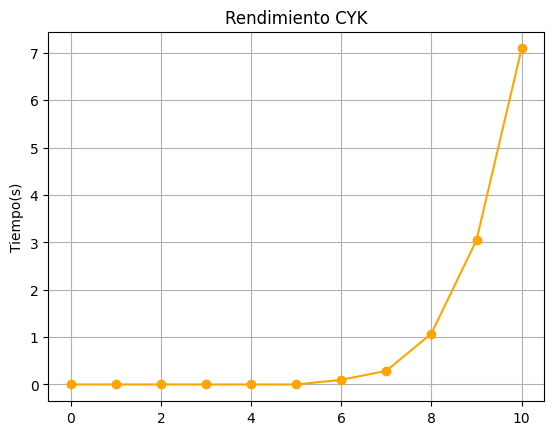

In [90]:
#Los  tiempos que resultaron  fueron:
import matplotlib.pyplot as plt


def file_handler(archivo):
    nums = []
    with open(archivo, 'r') as file:
        for linea in file:
            nums.append(float(linea.strip()))
    return nums

# Graficar los números
def graf(nums):
    plt.plot(nums, marker='o', linestyle='-', color='orange')
    plt.title('Rendimiento CYK')
    plt.xlabel('')
    plt.ylabel('Tiempo(s)')
    plt.grid(True)
    plt.show()

# Archivo de entrada con números flotantes
archivo = '/content/Tiempos.txt'

# Ejecutar
numeros = file_handler(archivo)
graf(numeros)


# Conclusión

El algoritmo CYK tiene una complejidad temporal de
𝑂(𝑛3), donde n es la longitud de la cadena que se desea analizar. Esta complejidad cúbica lo convierte en uno de los algoritmos más eficientes para el reconocimiento de lenguajes libres de contexto, pero también implica que el tiempo de ejecución crece rápidamente conforme aumenta la longitud de la cadena.

Aunque es uno de los algoritmos más eficientes en cuanto a reconocimiento de lenguajes libres de contexto, no es trivial de entender o implementar correctamente. Es crucial que la gramática esté bien definida y convertida a CNF para evitar errores en el procesamiento.

El algoritmo es efectivo y confiable para verificar la pertenencia de una cadena a un lenguaje libre de contexto. Sin embargo, su crecimiento cúbico en tiempo de ejecución lo hace ineficiente para análisis de cadenas largas. Si bien es un buen punto de partida para el análisis de gramáticas libres de contexto, se debe tener en cuenta la escalabilidad y considerar otras técnicas o algoritmos más rápidos para conjuntos de datos grandes.

### Fuentes